Shapley for model explanation

In [22]:
import shap
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Data preparation

In [23]:
df = pd.read_csv('../data/energydata_complete_cleaned.csv', parse_dates=['date'], index_col='date')
df.sort_index(inplace=True)
print('Data shape: ', df.shape)

# Define features and target variable
features = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 
            'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 
            'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 
            'Visibility', 'Tdewpoint', 'rv1',
            'is_weekend', 'hour_sin', 'hour_cos', 'day_of_week_sin', 
            'day_of_week_cos', 'Appliances_lag1', 'Appliances_rolling_mean_6']
target = 'Appliances'
print('Feature number: ', len(features))

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Data shape:  (19591, 38)
Feature number:  33
Training data shape:  (15672, 33)
Testing data shape:  (3919, 33)


XGBoost model

In [24]:
xgb_reg = xgb.XGBRegressor(
    n_estimators = 100,
    learning_rate = 0.03, 
    max_depth = 3, 
    random_state = 42
)

xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

Shapley explantion

In [ ]:
explainer = shap.Explainer(xgb_reg.predict, X_train)
shap_values = explainer(X_test)

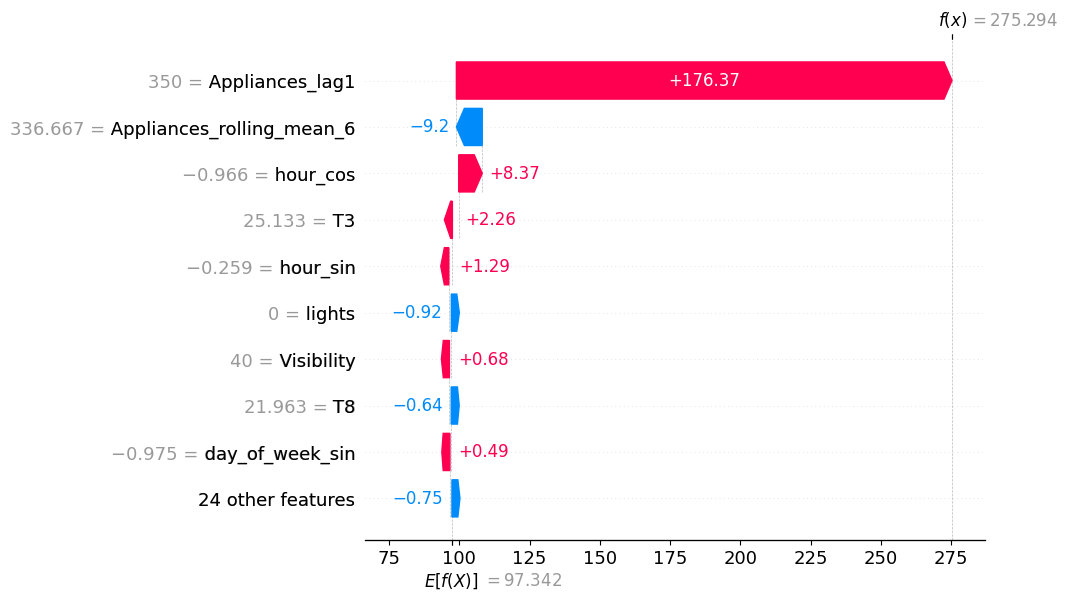

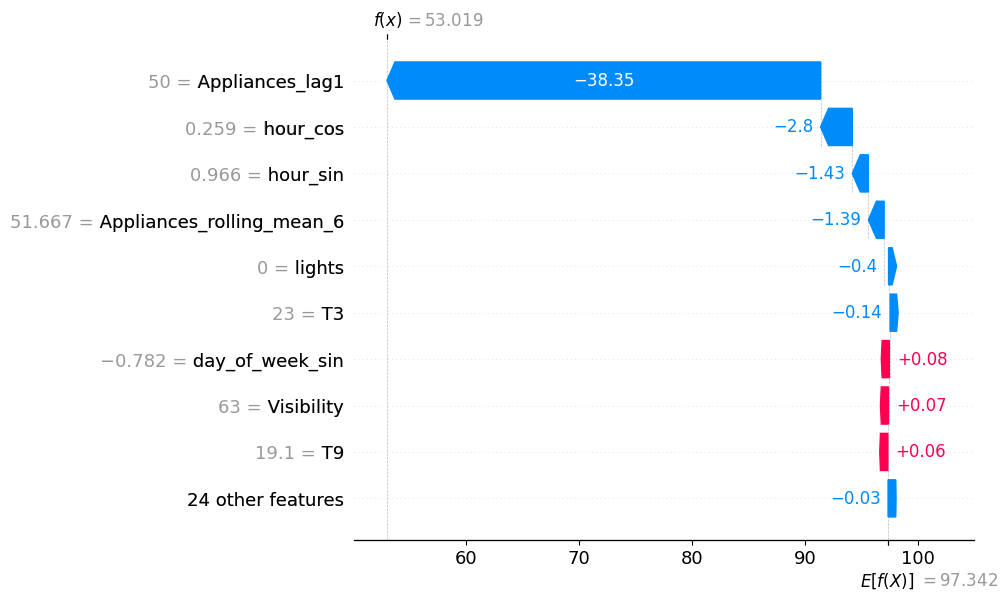

<Figure size 640x480 with 0 Axes>

In [ ]:
shap.plots.beeswarm(shap_values)
plt.savefig('../results/model_explanation/shap_explanation/shap_beeswarm.png', dpi=300)
shap.plots.waterfall(shap_values[0])
plt.savefig('../results/model_explanation/shap_explanation/shap_waterfall_0.png', dpi=300)
shap.plots.waterfall(shap_values[100])
plt.savefig('../results/model_explanation/shap_explanation/shap_waterfall_100.png', dpi=300)

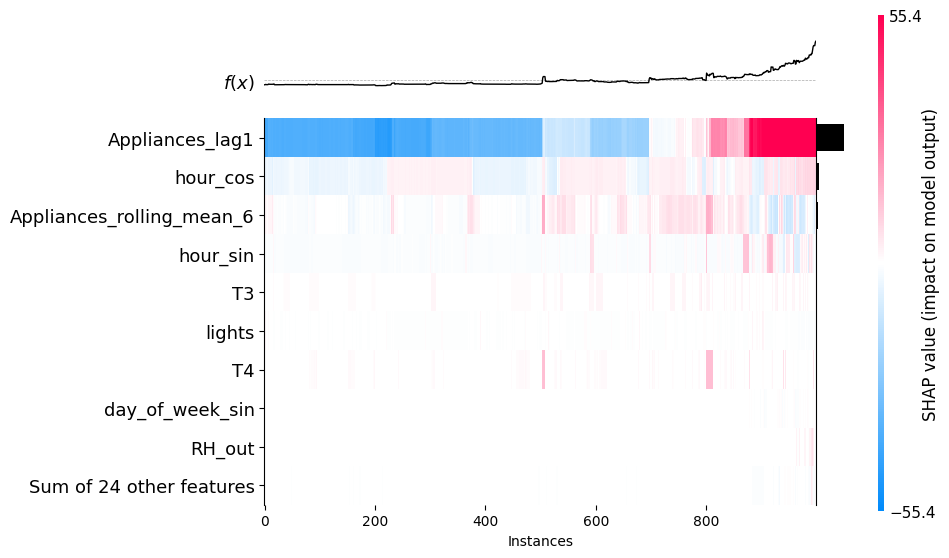

<Axes: xlabel='Instances'>

In [ ]:
shap.plots.heatmap(shap_values[:1000])